      ID   TV  Radio  Newspaper  Sales
0    789  274    990        320    338
1    366  495    607        166    544
2     11  301    729        801    102
3    425  392    779        214    691
4     88  553    401        588    889
..   ...  ...    ...        ...    ...
495  648  901    188        128    201
496  127  257    676        547    194
497  703  104    535        265    802
498  942  974    384        260    414
499  991  358     75        355    584

[500 rows x 5 columns]
0      338
1      544
2      102
3      691
4      889
      ... 
495    201
496    194
497    802
498    414
499    584
Name: Sales, Length: 500, dtype: int32


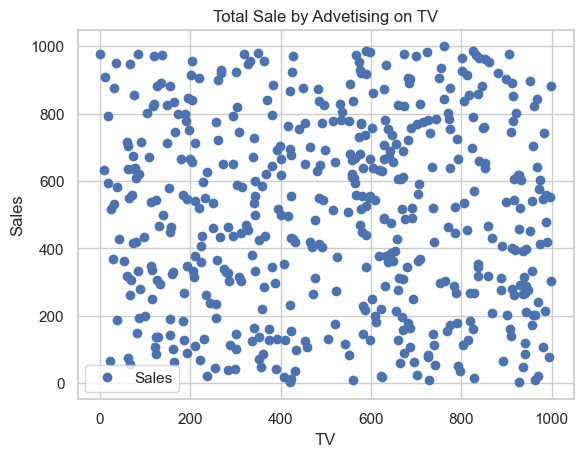

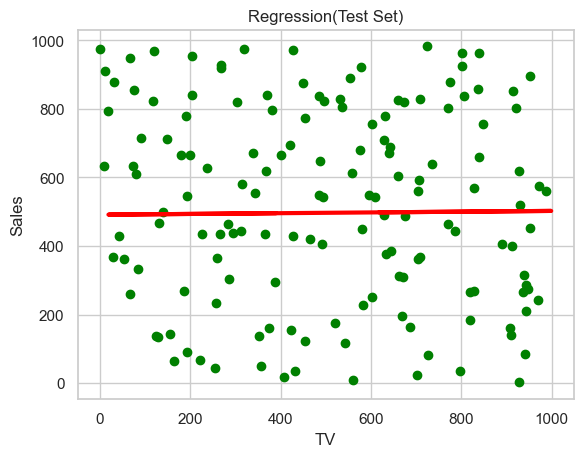

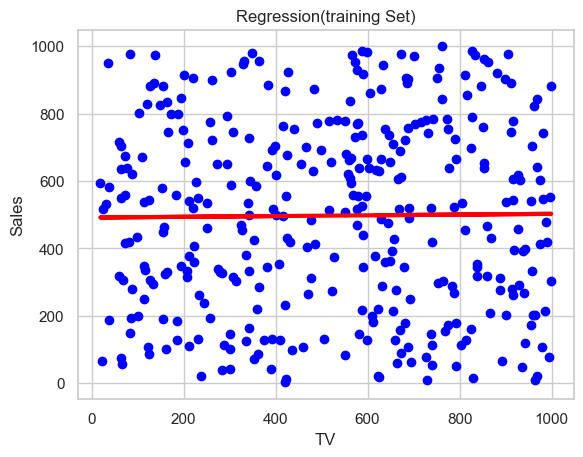

regressor intercept is
491.2922428010074

regressor coef is
[0.01101985]
     Actual   Predicted
90       85  501.672940
254     805  497.198882
283     569  500.416677
445     877  491.633858
461     499  492.824002
..      ...         ...
4       889  497.386219
318      44  494.091284
331     366  494.157403
245     405  496.702988
5       310  498.697581

[150 rows x 2 columns]
R2 score: -0.01
Mean Absolute Error: 245.79287687600822
Mean Squared Error: 81027.4584559676
Root Mean Squared Error: 284.65322491756103


In [16]:
#Ass 1
#Set A
#Q1
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error

A = np.random.randint(1,1000, size=(500,5))
df = pd.DataFrame(A, columns=['ID','TV','Radio','Newspaper','Sales'])
print(df)

X = df.drop(['ID','Radio','Newspaper','Sales'], axis=1)
y = df['Sales']
print(y)

import matplotlib.pyplot as plt
df.plot(x='TV', y='Sales', style='o')
plt.title('Total Sale by Advetising on TV')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

plt.scatter(X_test,y_test,color="green") 
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3)
plt.title('Regression(Test Set)')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

plt.scatter(X_train,y_train,color="blue")
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3)
plt.title('Regression(training Set)')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

print('regressor intercept is')
print(regressor.intercept_)
print()
print('regressor coef is')
print(regressor.coef_)


y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)
print('R2 score: %.2f' % r2_score(y_test,y_pred)) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Dataset:
   ID  flat  houses  purchases
0   1     4       4        559
1   2     5       1        455
2   3     3       5        423
3   4     5       3        232
4   5     5       3        987

Training set shapes:
X_train shape: (400, 2), y_train shape: (400,)

Testing set shapes:
X_test shape: (100, 2), y_test shape: (100,)

Model Evaluation:
Mean Squared Error: 63893.639366977375
R-squared: -0.02104726073821328


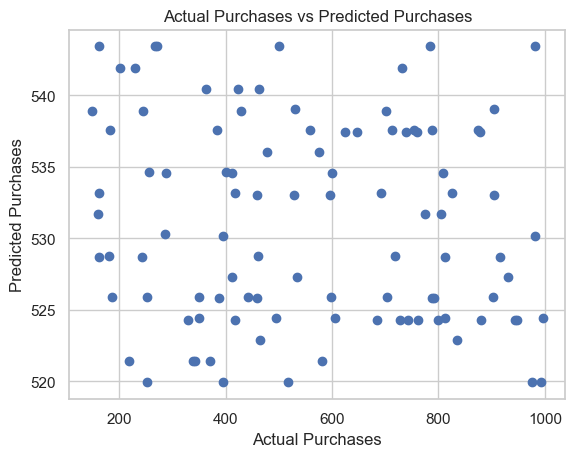

In [17]:
#Q2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


np.random.seed(42)


data = {
    'ID': range(1, 501),
    'flat': np.random.randint(1, 6, 500),
    'houses': np.random.randint(1, 6, 500),
    'purchases': np.random.randint(100, 1000, 500)
}

df = pd.DataFrame(data)


print("Dataset:")
print(df.head())


X = df[['flat', 'houses']]
y = df['purchases']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set shapes:")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print("\nTesting set shapes:")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


plt.scatter(y_test, y_pred)
plt.xlabel("Actual Purchases")
plt.ylabel("Predicted Purchases")
plt.title("Actual Purchases vs Predicted Purchases")
plt.show()

Dataset:
   User ID  Gender  Age  EstimatedSalary  Purchased
0        1    Male   38            36907          1
1        2  Female   49            38777          0
2        3    Male   40            71745          0
3        4    Male   50            43624          0
4        5    Male   20            43321          1

Model Evaluation:
Accuracy: 0.46

Confusion Matrix:
[[18 43]
 [11 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.30      0.40        61
           1       0.39      0.72      0.51        39

    accuracy                           0.46       100
   macro avg       0.51      0.51      0.45       100
weighted avg       0.53      0.46      0.44       100



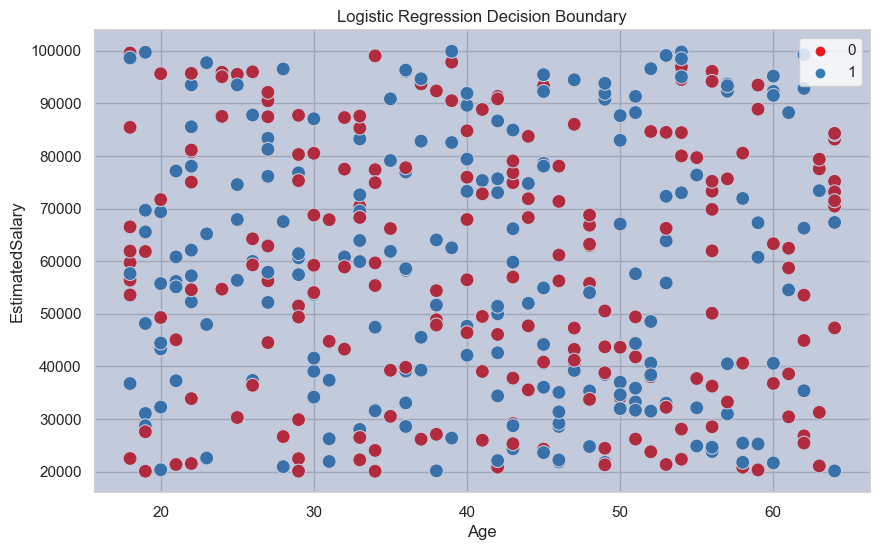

In [18]:
#3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


np.random.seed(42)


data = {
    'User ID': range(1, 501),

    'Gender': np.random.choice(['Male', 'Female'], size=500),
    'Age': np.random.randint(18, 65, 500),
    'EstimatedSalary': np.random.randint(20000, 100000, 500),
    'Purchased': np.random.choice([0, 1], size=500) 
}

df = pd.DataFrame(data)


print("Dataset:")
print(df.head())


X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(random_state=42)


model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


if X.shape[1] == 2:
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))


    sns.scatterplot(x=X_train['Age'], y=X_train['EstimatedSalary'], hue=y_train, palette='Set1', marker='o', s=100)

    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)

    plt.title('Logistic Regression Decision Boundary')
    plt.xlabel('Age')
    plt.ylabel('EstimatedSalary')
    plt.legend(loc='upper right')
    plt.show()

In [11]:
#Ass 1
#Set B
#Q1
from google.colab import files
import pandas as pd
fish_uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(fish_uploaded['Fish.csv']))
print(df)
X = df.drop(['Weight', 'Species'], axis=1)
y = df['Weight']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=101) 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
lr.score(X_test, y_test)
df_t = df.copy()
df_t['Predicted Weight'] = lr.predict(df_t.drop(['Weight', 'Species'], axis=1))
df_t['Difference'] = df_t['Weight'] - df_t['Predicted Weight']
df_t[['Weight', 'Predicted Weight', 'Difference']].head(20)


NameError: name 'files' is not defined

In [20]:
#Ass 1
#Set B
#Q1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = pd.read_csv('Fish.csv')  


print(df)


X = df.drop(['Weight', 'Species'], axis=1)
y = df['Weight']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)


lr = LinearRegression()


lr.fit(X_train, y_train)


print("R-squared Score:", lr.score(X_test, y_test))


df_t = df.copy()


df_t['Predicted Weight'] = lr.predict(df_t.drop(['Weight', 'Species'], axis=1))
df_t['Difference'] = df_t['Weight'] - df_t['Predicted Weight']


df_t[['Weight', 'Predicted Weight', 'Difference']].head(20)


     Category Species  Weight   Height   Width  Length1  Length2  Length3
0           1   Bream   242.0  11.5200  4.0200     23.2     25.4     30.0
1           1   Bream   290.0  12.4800  4.3056     24.0     26.3     31.2
2           1   Bream   340.0  12.3778  4.6961     23.9     26.5     31.1
3           1   Bream   363.0  12.7300  4.4555     26.3     29.0     33.5
4           1   Bream   430.0  12.4440  5.1340     26.5     29.0     34.0
..        ...     ...     ...      ...     ...      ...      ...      ...
154         6   Smelt    12.2   2.0904  1.3936     11.5     12.2     13.4
155         6   Smelt    13.4   2.4300  1.2690     11.7     12.4     13.5
156         6   Smelt    12.2   2.2770  1.2558     12.1     13.0     13.8
157         6   Smelt    19.7   2.8728  2.0672     13.2     14.3     15.2
158         6   Smelt    19.9   2.9322  1.8792     13.8     15.0     16.2

[159 rows x 8 columns]
R-squared Score: 0.8787074730225397


,Weight,Predicted Weight,Difference
0,242.0,290.915017,-48.915017
1,290.0,342.617803,-52.617803
2,340.0,354.454065,-14.454065
3,363.0,419.960329,-56.960329
4,430.0,405.547735,24.452265
5,450.0,455.143676,-5.143676
6,500.0,497.596488,2.403512
7,390.0,430.884174,-40.884174
8,450.0,489.602446,-39.602446
9,500.0,505.470120,-5.470120


In [19]:
#2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris


iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]


species_details = iris_df.groupby('species').describe()
print("\nBasic Statistical Details:")
print(species_details)


X = iris_df.iloc[:, :4]  
y = iris_df['species']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Basic Statistical Details:
           sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
setosa                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)         ... petal length (cm)       \
                      count   mean  ...               75%  max   
species                             ...                          
setosa                 50.0  3.428  ...             1.575  1.9   
versicolor             50.0  2.770  ...             4.600  5.1   
virginica              50.0  2.974  ...             5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  